In [1]:
import numpy as np
import pandas as pd

In [2]:
bus_tr = pd.read_csv('train.csv')
bus_tr.head(5)

,id,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude,next_arrive_time
0,0,2019-10-15,405136001,7997025,360-1,33.456267,126.551750,제주대학교입구,06시,266.0,제대마을,33.457724,126.554014,24
1,1,2019-10-15,405136001,7997025,360-1,33.457724,126.554014,제대마을,06시,333.0,제대아파트,33.458783,126.557353,36
2,2,2019-10-15,405136001,7997025,360-1,33.458783,126.557353,제대아파트,06시,415.0,제주대학교,33.459893,126.561624,40
3,3,2019-10-15,405136001,7997025,360-1,33.479705,126.543811,남국원(아라방면),06시,578.0,제주여자중고등학교(아라방면),33.484860,126.542928,42
4,4,2019-10-15,405136001,7997025,360-1,33.485662,126.494923,도호동,07시,374.0,은남동,33.485822,126.490897,64


In [33]:
bus_te = pd.read_csv('test.csv')
bus_te.head(3)

,id,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude
0,210457,2019-10-29,405136001,7997025,360-1,33.457724,126.554014,제대마을,07시,333.0,제대아파트,33.458783,126.557353
1,210458,2019-10-29,405136001,7997025,360-1,33.458783,126.557353,제대아파트,07시,415.0,제주대학교,33.459893,126.561624
2,210459,2019-10-29,405136001,7997025,360-1,33.478867,126.483833,한라중학교/부영아파트,08시,417.0,대림2차아파트,33.478850,126.488350


In [12]:
bus_te.columns

Index(['id', 'date', 'route_id', 'vh_id', 'route_nm', 'now_latitude',
       'now_longitude', 'now_station', 'now_arrive_time', 'distance',
       'next_station', 'next_latitude', 'next_longitude'],
      dtype='object')

#### train data 
- id                : 해당 데이터의 고유 ID 
- date              : 버스운행날짜
- route_id          : 버스 노선 ID
- vh_id             : 버스 ID
- route_nm          : 버스 노선 실제 번호
- now_latitude      : 현재 정류소의 위도
- now_longitude     : 현재 정류소의 경도
- now_station       : 현재 정류소 이름
- now_arrive_time   : 현재 정류장에 도착한 시간 
- distance          : 현재 정류장 ~ 다음 정류장 실제 이동거리
- next_station      : 다음 정류소 이름
- next_latitude     : 다음 정류소 위도 
- next_longitude    : 다음 정류소 경도
- next_arrive_time  : 다음 정류장에 도착할 때까지 걸린 시간(단위 : 초) / "target"

In [13]:
# test 데이터는 next_Arrive_time (target)필드를 제외하고 동일함 

In [17]:
bus_tr.isnull().sum()
# 결측치는 X

id                  0
date                0
route_id            0
vh_id               0
route_nm            0
now_latitude        0
now_longitude       0
now_station         0
now_arrive_time     0
distance            0
next_station        0
next_latitude       0
next_longitude      0
next_arrive_time    0
dtype: int64

In [28]:
# bus_tr1 = bus_tr.drop('next_arrive_time', axis=1)   # target 행 잠깐 버리고 test와 동일형태로 만들어줌 
# bus_tr1.head(3)

,id,date,route_id,vh_id,route_nm,now_latitude,now_longitude,now_station,now_arrive_time,distance,next_station,next_latitude,next_longitude
0,0,2019-10-15,405136001,7997025,360-1,33.456267,126.551750,제주대학교입구,06시,266.0,제대마을,33.457724,126.554014
1,1,2019-10-15,405136001,7997025,360-1,33.457724,126.554014,제대마을,06시,333.0,제대아파트,33.458783,126.557353
2,2,2019-10-15,405136001,7997025,360-1,33.458783,126.557353,제대아파트,06시,415.0,제주대학교,33.459893,126.561624


In [54]:
# 데이터 형태확인
print(bus_tr.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210457 entries, 0 to 210456
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                210457 non-null  int64  
 1   date              210457 non-null  object 
 2   route_id          210457 non-null  int64  
 3   vh_id             210457 non-null  int64  
 4   route_nm          210457 non-null  object 
 5   now_latitude      210457 non-null  float64
 6   now_longitude     210457 non-null  float64
 7   now_station       210457 non-null  object 
 8   now_arrive_time   210457 non-null  object 
 9   distance          210457 non-null  float64
 10  next_station      210457 non-null  object 
 11  next_latitude     210457 non-null  float64
 12  next_longitude    210457 non-null  float64
 13  next_arrive_time  210457 non-null  int64  
dtypes: float64(5), int64(4), object(5)
memory usage: 22.5+ MB
None


In [59]:
# 기초통계 
print(bus_tr.describe())

                  id      route_id         vh_id   now_latitude  \
count  210457.000000  2.104570e+05  2.104570e+05  210457.000000   
mean   105228.000000  4.052491e+08  7.988694e+06      33.434528   
std     60753.847139  9.132404e+04  6.774077e+03       0.102350   
min         0.000000  4.051360e+08  7.983000e+06      33.244382   
25%     52614.000000  4.051365e+08  7.983093e+06      33.325283   
50%    105228.000000  4.053201e+08  7.983431e+06      33.484667   
75%    157842.000000  4.053201e+08  7.997041e+06      33.500197   
max    210456.000000  4.053281e+08  7.997124e+06      33.556167   

       now_longitude       distance  next_latitude  next_longitude  \
count  210457.000000  210457.000000  210457.000000   210457.000000   
mean      126.603451     490.256100      33.434711      126.603687   
std         0.123961     520.563932       0.102224        0.123838   
min       126.473300      97.000000      33.244382      126.473300   
25%       126.523900     291.000000      33.32

In [68]:
bus_tr['next_arrive_time'].describe()
# 이전 ~ 다음 정류장까지 걸린 시간 
# min : 6s
# max : 2996s (49m)
# mean : 85s (1m 15s)



count    210457.000000
mean         85.380824
std          85.051170
min           6.000000
25%          44.000000
50%          66.000000
75%         102.000000
max        2996.000000
Name: next_arrive_time, dtype: float64

<AxesSubplot:>

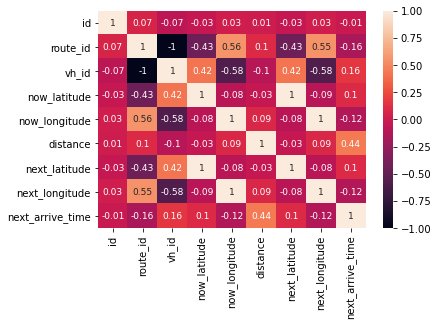

In [88]:
import seaborn as sns
data = bus_tr.corr(method='pearson').round(2)
sns.heatmap(data=data, annot=True, annot_kws={"size":9})

<AxesSubplot:>

C:\Users\ICT01_11\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\ICT01_11\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0, flags=flags)


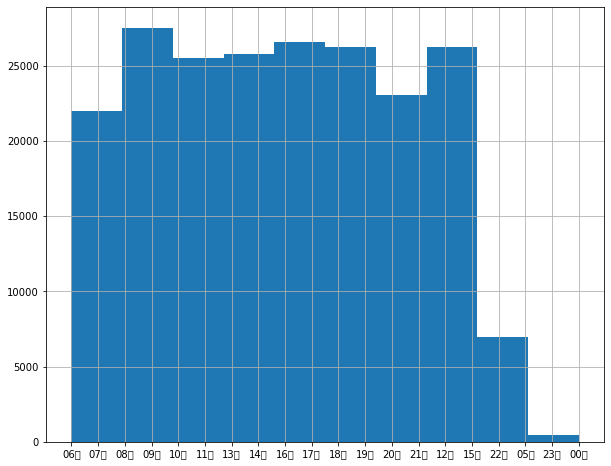

In [93]:
now_arrive_time = bus_tr['now_arrive_time']
now_arrive_time.hist(figsize=(10,8))

In [94]:
bus_tr['now_arrive_time'].unique()

array(['06시', '07시', '08시', '09시', '10시', '11시', '13시', '14시', '16시',
       '17시', '18시', '19시', '20시', '21시', '12시', '15시', '22시', '05시',
       '23시', '00시'], dtype=object)

In [78]:
import matplotlib as plt
import seaborn as sns

<AxesSubplot:xlabel='route_nm', ylabel='next_arrive_time'>

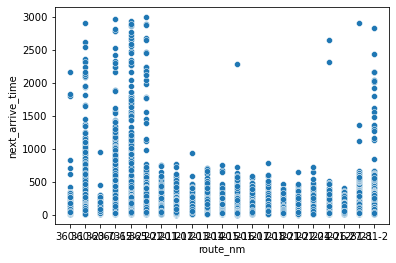

In [84]:
sns.scatterplot(x='route_nm', y='next_arrive_time', data=bus_tr,)

In [85]:
plt.scatterplot(x='route_nm', y='next_arrive_time', data=bus_tr,)

AttributeError: module 'matplotlib' has no attribute 'scatterplot'

In [82]:
# pandas dataframe의 함수 plot()
x=bus_tr['now_latitude']
y=bus_tr['next_arrive_time']

plt.figure(figsize=(10,5))
bus_tr.plot.scatter(x,y)
plt.show()

TypeError: 'module' object is not callable

In [48]:
# 상관계수 (피어슨)
# 공분산 기반, 등간/비율척도 사용 변수에만 적용가능
np.corrcoef(bus_tr['id'], bus_tr['next_arrive_time'])

array([[ 1.        , -0.01042025],
       [-0.01042025,  1.        ]])

In [ ]:
# spearman 상관계수 
# 서열척도를 사용한 변수가 포함되어 있을 때 
# 여긴 서열은 X 

In [51]:
cols = [bus_tr['id'], bus_tr['date'], bus_tr['route_id'], bus_tr['vh_id'], bus_tr['route_nm'], bus_tr['now_latitude'],
       bus_tr['now_longitude'], bus_tr['now_station'], bus_tr['now_arrive_time'], bus_tr['distance'],
       bus_tr['next_station'], bus_tr['next_latitude'], bus_tr['next_longitude']]
y = bus_tr['next_arrive_time']

import scipy.stats
for col in cols: 
    print(scipy.stats.pearsonr(col, y))

AttributeError: module 'scipy.stats' has no attribute 'pearson'

In [52]:
import scipy.stats

scipy.stats.pearsonr(bus_tr['route_id'],bus_tr['next_arrive_time'] )

(-0.15762199704856122, 0.0)

In [ ]:
# Later 
# now_arrive_time은 실수인데 next_arrive_time은 정수네 